# General tent map adjacency check.

This check works by comparing the adjacency matrix generated by the new general tent map code run on the standard tent map with Ulams method. Notebook 04_super_adjajcy_matrix.ipynb in the linear_tent_map folder contains the scatter plot for the standard tent map computed with the old code. The outputs look similar.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from chebyshev_hofbauer_resonances.general_tent_map.approx_transfer_op import (
    approx_super_adjacency,
    approx_ulams,
)

In [2]:
alpha = 1.2
function_domains = [(0, 0.5), (0.5, 1)]
functions = [lambda x: 1.2 * x, lambda x: 1.2 * (1 - x)]
inverses = [lambda y: y / 1.2, lambda y: 1 - (y / 1.2)]
derivatives = [lambda x: 1.2, lambda x: -1.2]

In [11]:
super_adjacency = approx_super_adjacency(function_domains, functions, inverses, derivatives, 100, 100, 30)

evals_super_adj = np.linalg.eigvals(super_adjacency)
evals_super_adj = evals_super_adj[np.argsort(-np.abs(evals_super_adj))]

np.abs(evals_super_adj).max()

0.9982044954317355

In [6]:
L_ulam = approx_ulams(function_domains, functions, inverses, derivatives, N=1000, M=10000)

evals_ulam = np.linalg.eigvals(L_ulam)
evals_ulam = evals_ulam[np.argsort(-np.abs(evals_ulam))]

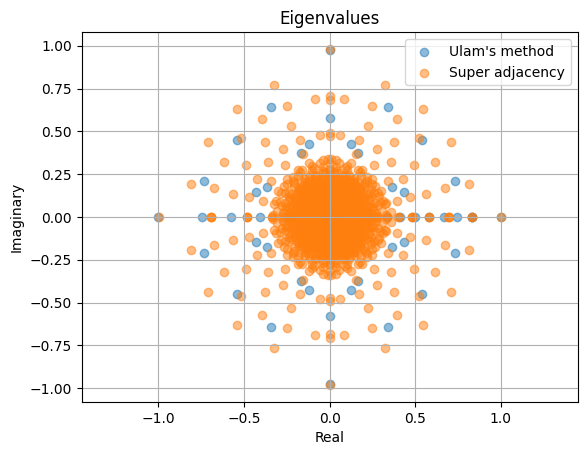

In [13]:
plt.scatter(evals_ulam.real, evals_ulam.imag, label="Ulam's method", alpha=0.5)
plt.scatter(evals_super_adj.real, evals_super_adj.imag, label="Super adjacency", alpha=0.5)

plt.axis('equal')
plt.legend()
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Eigenvalues')
plt.grid(True)